# Credit card fraud detection

In this project, I will attempt to detect credit card fraud. It's more important that we do not overlook fraudulent activity, so here it will be more important to reduce false negatives, or Type II errors.


Kaggle dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from matplotlib import rcParams

In [2]:
df = pd.read_csv('data/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Great - doesn't look like there are missing values here.

-----------

The data is a bit ambiguous here to protect client privacy. There are 3 clearly described features and 28 not.

Time: the amount of time that has passed in in seconds between this transaction and the first one in the dataset.

Amount: amount spent in transaction

Class: 1 for fraudulent transaction

In [9]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

There is a class imbalance problem here. I might want to undersample legitimate transactions or add weight to the fraudulent transactions.

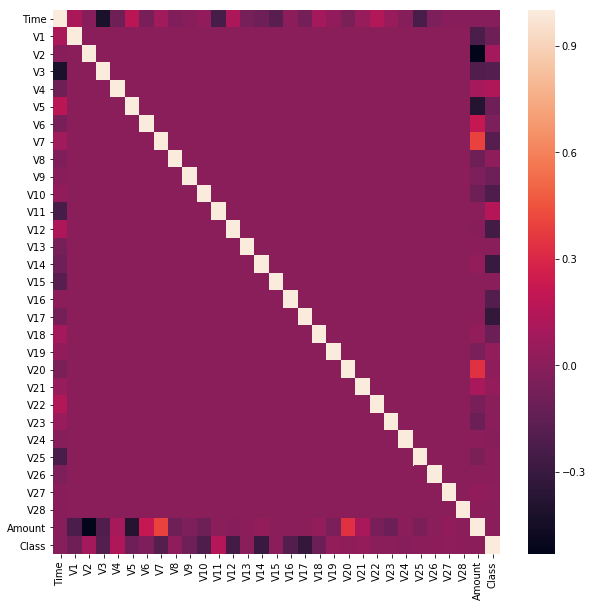

In [17]:
rcParams['figure.figsize'] = 10,10
sns.heatmap(df.corr())

Looks like there is some non-strongly linear correlations between fraudulent and V10, V12, V14, V16, V17.

There aren't too many classes here, I'll try a random forest run with the data as is.

In [21]:
features = df.drop(['Class'], axis=1)
target = df.Class

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.2, random_state=1)

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

rfc_train_predict = rfc.predict(X_train)
rfc_test_predict = rfc.predict(X_test)

In [29]:
rfc.score(X_train, y_train)

0.999890276284316

In [30]:
rfc.score(X_test, y_test)

0.9995962220427653

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, rfc_test_predict)

array([[56856,     8],
       [   15,    83]], dtype=int64)

This random forest was amazing for determining credit card fraud! Unfortunately there's still a bit more false negative than false positive. It's better to accidentally double check a legitimate transaction than miss one that is fraudulent. I will try to improve these false negatives.

In [31]:
rfc = RandomForestClassifier(class_weight='balanced')

rfc.fit(X_train, y_train)

rfc_train_predict = rfc.predict(X_train)
rfc_test_predict = rfc.predict(X_test)

confusion_matrix(y_test, rfc_test_predict)

array([[56858,     6],
       [   20,    78]], dtype=int64)

Weight balancing the class did not help. 

In [32]:
rfc = RandomForestClassifier(class_weight={0:0.5, 1:1})

rfc.fit(X_train, y_train)

rfc_train_predict = rfc.predict(X_train)
rfc_test_predict = rfc.predict(X_test)

confusion_matrix(y_test, rfc_test_predict)

array([[56859,     5],
       [   13,    85]], dtype=int64)

Progress! I decreased class weight of legitimate by 0.5. Let's try to further increase that.

In [34]:
rfc = RandomForestClassifier(class_weight={0:0.1, 1:1})

rfc.fit(X_train, y_train)

rfc_train_predict = rfc.predict(X_train)
rfc_test_predict = rfc.predict(X_test)

confusion_matrix(y_test, rfc_test_predict)

array([[56858,     6],
       [   18,    80]], dtype=int64)

In [35]:
rfc = RandomForestClassifier(class_weight={0:0.75, 1:1})

rfc.fit(X_train, y_train)

rfc_train_predict = rfc.predict(X_train)
rfc_test_predict = rfc.predict(X_test)

confusion_matrix(y_test, rfc_test_predict)

array([[56859,     5],
       [   15,    83]], dtype=int64)